# DCGAN with Keras using MNIST

In [27]:
from tensorflow.keras import datasets, layers, models, utils, optimizers
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

train_images <class 'numpy.ndarray'> (60000, 28, 28) uint8


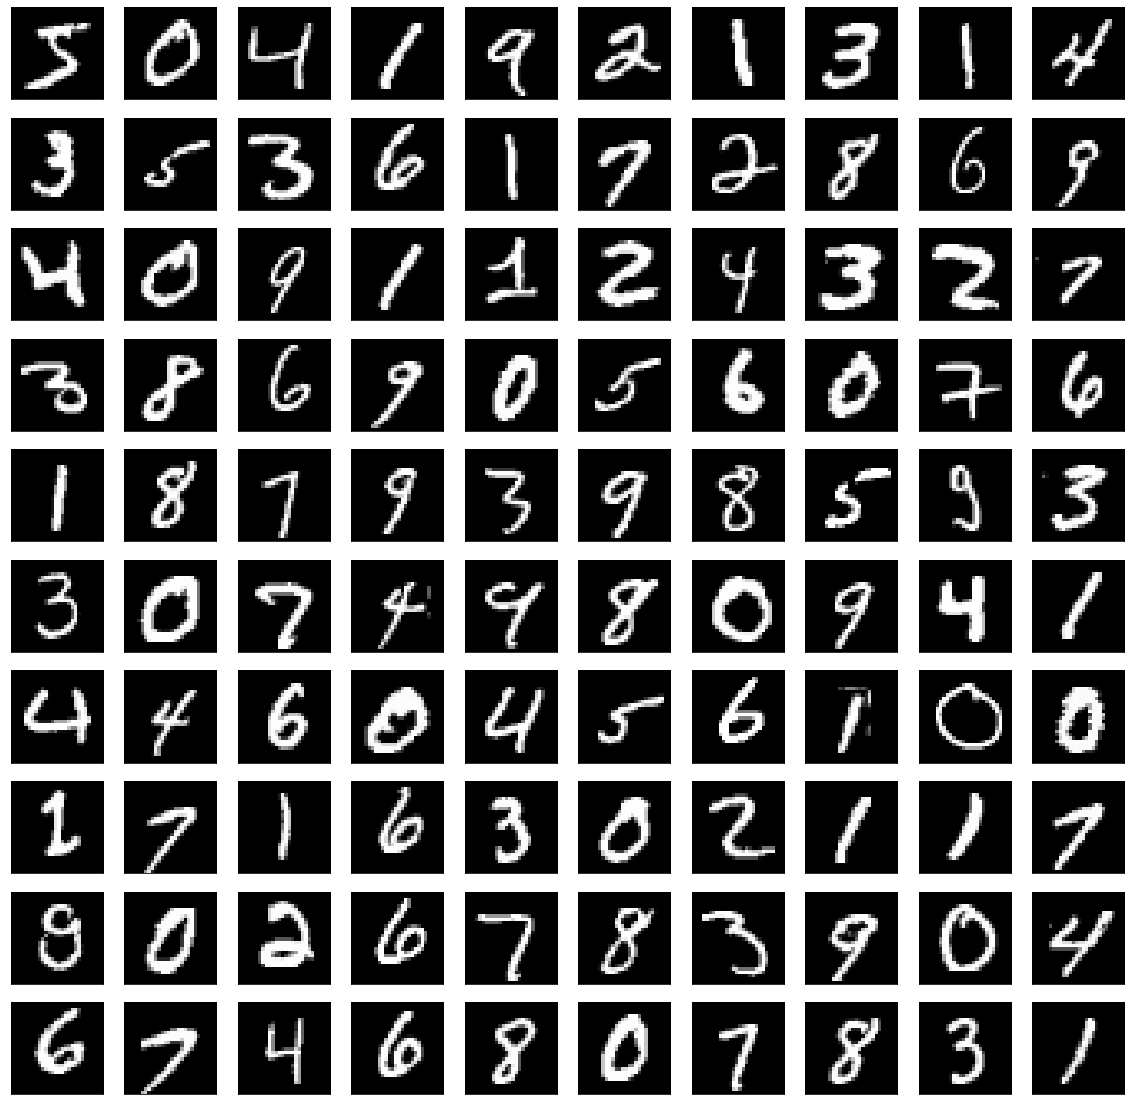

In [28]:
# load and visualize data
(train_x, _), (test_x,_) = datasets.mnist.load_data()

print('train_images', type(train_x), train_x.shape, train_x.dtype)

plt.figure(figsize=(20,20))
for i in range(0, 10*10):
    plt.subplot(10, 10, i+1)
    plt.xticks([]); plt.yticks([])
    plt.imshow(train_x[i], cmap='gray')


In [29]:
# normalize_1

_, H, W = train_x.shape
train_x = (train_x.reshape(-1, H, W, 1) / 127.5 - 1).astype('float32')
tset_x = (test_x.reshape(-1, H, W, 1))
print('train_image', type(train_x), train_x.shape, train_x.dtype)

train_image <class 'numpy.ndarray'> (60000, 28, 28, 1) float32


In [31]:
# normalize_2 (test)
'''
_, H, W = train_x.shape

train_x = train_x.reshape(train_x.shape[0], H, W, 1)
test_x = test_x.reshape(test_x.shape[0], H, W, 1)
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')

train_x /= 255
test_x /= 255

np.expand_dims(train_x, axis=0)
np.expand_dims(test_x, axis=0)


print('train_image', type(train_x), train_x.shape, train_x.dtype)

'''

"\n_, H, W = train_x.shape\n\ntrain_x = train_x.reshape(train_x.shape[0], H, W, 1)\ntest_x = test_x.reshape(test_x.shape[0], H, W, 1)\ntrain_x = train_x.astype('float32')\ntest_x = test_x.astype('float32')\n\ntrain_x /= 255\ntest_x /= 255\n\nnp.expand_dims(train_x, axis=0)\nnp.expand_dims(test_x, axis=0)\n\n\nprint('train_image', type(train_x), train_x.shape, train_x.dtype)\n\n"

In [41]:
input_dim = 10

def gen_noise(batch_size):
    return np.random.uniform(-1, 1, (batch_size, input_dim))


In [49]:
# build a generator
generator = models.Sequential()

generator.add(layers.Dense(7*7*128, input_dim=input_dim))
generator.add(layers.LeakyReLU(0.2))
generator.add(layers.Reshape((7, 7, 128)))

generator.add(layers.UpSampling2D(size=(2,2)))
generator.add(layers.Conv2D(64, kernel_size=(5,5), padding='same'))
generator.add(layers.LeakyReLU(0.2))

generator.add(layers.UpSampling2D(size=(2,2)))
generator.add(layers.Conv2D(1, kernel_size=(5,5), padding='same', activation='tanh'))

generator.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6272)              68992     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 6272)              0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
up_sampling2d_6 (UpSampling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        204864    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
up_sampling2d_7 (UpSampling2 (None, 28, 28, 64)       

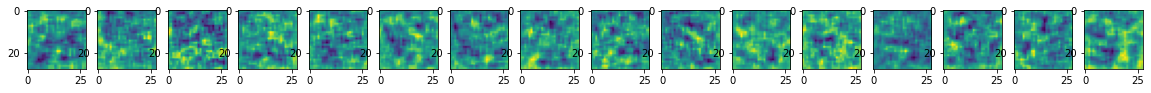

In [48]:
generated = generator.predict(gen_noise(16))

plt.figure(figsize=(20,2))
for i in range(16):
    plt.subplot(1, 16, i+1)

    plt.imshow(generated[i].reshape(H,W))

In [55]:
# build a discriminator
discriminator = models.Sequential()

discriminator.add(layers.Conv2D(64, kernel_size=(5,5), strides=(2,2), padding='same', input_shape=(H,W,1)))
discriminator.add(layers.LeakyReLU(0.2))
discriminator.add(layers.Dropout(0.3))

discriminator.add(layers.Conv2D(128, kernel_size=(5,5), strides=(2,2), padding='same'))
discriminator.add(layers.LeakyReLU(0.3))
discriminator.add(layers.Dropout(0.3))

discriminator.add(layers.Flatten())
discriminator.add(layers.Dense(1, activation='sigmoid'))

discriminator.summary()


# discriminator trainable = True
optimizer=optimizers.Adam(lr=0.0002, beta_1=0.5)
discriminator.compile(optimizer=optimizer, loss='binary_crossentropy')

print(discriminator.predict(generated[0:3]))
print('-'*50)
print(discriminator.predict(train_x[0:3]))




Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)             

In [56]:
GD = models.Sequential()
GD.add(generator)
GD.add(discriminator)

discriminator.trainable = False
GD.compile(optimizer=optimizer, loss='binary_crossentropy')

GD.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 28, 28, 1)         275457    
_________________________________________________________________
sequential_8 (Sequential)    (None, 1)                 212865    
Total params: 488,322
Trainable params: 275,457
Non-trainable params: 212,865
_________________________________________________________________
